In [1]:
import sys
sys.path.append("../")

from sklearn.datasets import fetch_california_housing
import torch

# Charger les données
data = fetch_california_housing()

X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.float32).reshape(-1, 1)



In [2]:
from core.MLp_layer import Layer
from core.model_structure import Deep_learning_Model


In [3]:

MLp_model=Deep_learning_Model(
    "adam","Mse"
)

MLp_model

In [4]:
########## Adding Layers to the model  ##############
# layer with xavier intilaztion
# 
# 
# 
#  
MLp_model.add_layers([
Layer(X.shape[1],128,"Xaviernormal","lakyrelu"),
Layer(128,64,"Xaviernormal","lakyrelu"),
Layer(64,5,"Xaviernormal","lakyrelu"),
Layer(5,1,"Xaviernormal")]
)




In [5]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")

 xtrain_shape :torch.Size([14447, 8]) , x_test_shape:torch.Size([6193, 8]) ytrain_shape:torch.Size([14447, 1]) ytest_shape:torch.Size([6193, 1])


In [6]:
train_losses,val_losses=MLp_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.0001)


1 | Train Loss: 12573.4347 | Val Loss: 11467.8984
2 | Train Loss: 11536.6918 | Val Loss: 10464.1680
3 | Train Loss: 10528.9235 | Val Loss: 9503.8633
4 | Train Loss: 9554.4891 | Val Loss: 8587.7432
5 | Train Loss: 8643.0522 | Val Loss: 7714.9478
6 | Train Loss: 7770.5771 | Val Loss: 6885.3647
7 | Train Loss: 6935.3126 | Val Loss: 6095.4780
8 | Train Loss: 6143.0422 | Val Loss: 5358.6426
9 | Train Loss: 5396.8741 | Val Loss: 4680.2871
10 | Train Loss: 4705.8369 | Val Loss: 4060.6116
11 | Train Loss: 4097.4514 | Val Loss: 3495.8081
12 | Train Loss: 3527.2131 | Val Loss: 2983.9753
13 | Train Loss: 3014.6852 | Val Loss: 2523.6492
14 | Train Loss: 2549.1686 | Val Loss: 2112.9375
15 | Train Loss: 2136.2218 | Val Loss: 1749.9395
16 | Train Loss: 1771.7546 | Val Loss: 1432.3633
17 | Train Loss: 1450.3413 | Val Loss: 1157.5260
18 | Train Loss: 1173.4387 | Val Loss: 922.5936
19 | Train Loss: 937.6180 | Val Loss: 723.8186
20 | Train Loss: 736.9028 | Val Loss: 558.1470
21 | Train Loss: 570.1639 | V

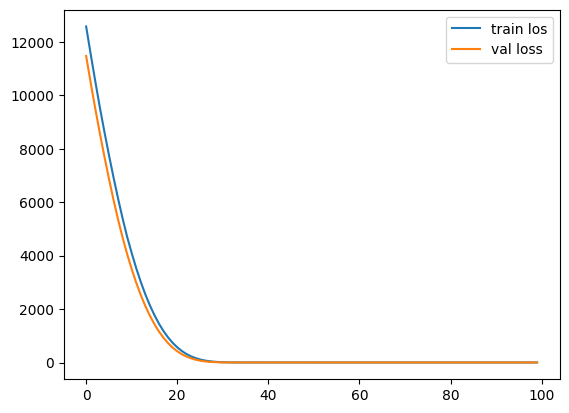

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()